# Problem Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.

The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In this analysis, I have focused more on the visualizations part and its interpretation

# Libraries

In [1]:
import numpy as np
import pandas as pd 
import os
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.getcwd()

'C:\\Users\\Maxie\\Documents\\Python For Data Science Handbook\\Blossom Academy\\BIG MART SALES PREDICTION FINAL PROJECT'

In [4]:
os.chdir(
    'C:\\Users\\Maxie\\Documents\\Python For Data Science Handbook\\Blossom Academy\\BIG MART SALES PREDICTION FINAL PROJECT'
)

In [5]:
os.getcwd()

'C:\\Users\\Maxie\\Documents\\Python For Data Science Handbook\\Blossom Academy\\BIG MART SALES PREDICTION FINAL PROJECT'

In [6]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Hello World !' + color.END)

Hello World !


# Read CSV files

In [7]:
sales_train = pd.read_csv(r"train.csv", sep=',', encoding="latin1") 
pd.set_option('display.max_columns', None)

In [8]:
sales_test = pd.read_csv(r"test.csv", sep=',', encoding="latin1") 
pd.set_option('display.max_columns', None)

In [9]:
sales_train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3406,FDQ23,6.55,Low Fat,0.024665,Breads,103.3332,OUT017,2007,NaN,Tier 2,Supermarket Type1,2050.6640
2231,FDY25,12.00,Low Fat,0.033974,Canned,181.8976,OUT046,1997,Small,Tier 1,Supermarket Type1,4527.4400
1508,NCR53,12.15,Low Fat,0.000000,Health and Hygiene,224.4404,OUT018,2009,Medium,Tier 3,Supermarket Type2,5626.0100
377,FDF45,18.20,Regular,0.012195,Fruits and Vegetables,57.7904,OUT013,1987,High,Tier 3,Supermarket Type1,1464.7600
6376,FDD05,19.35,Low Fat,0.016611,Frozen Foods,122.0098,OUT046,1997,Small,Tier 1,Supermarket Type1,2651.2156


In [10]:
sales_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Exploratory Data Analysis

In [11]:
print(color.BOLD + "Shape of sales training data:" + color.END, sales_train.shape, "\n")
print(color.BOLD + "Shape of sales testing data:"+ color.END, sales_test.shape, "\n")

Shape of sales training data: (8523, 12) 

Shape of sales testing data: (5681, 11) 



In [12]:
print("Q: Are there any missing values in training data?", "\n" +
      "A: {}".format(sales_train.isna().values.any()))
print ( )
print("Q: Are there any missing values in test data?", "\n" +
      "A: {}".format(sales_test.isna().values.any()))

Q: Are there any missing values in training data? 
A: True

Q: Are there any missing values in test data? 
A: True



Completed


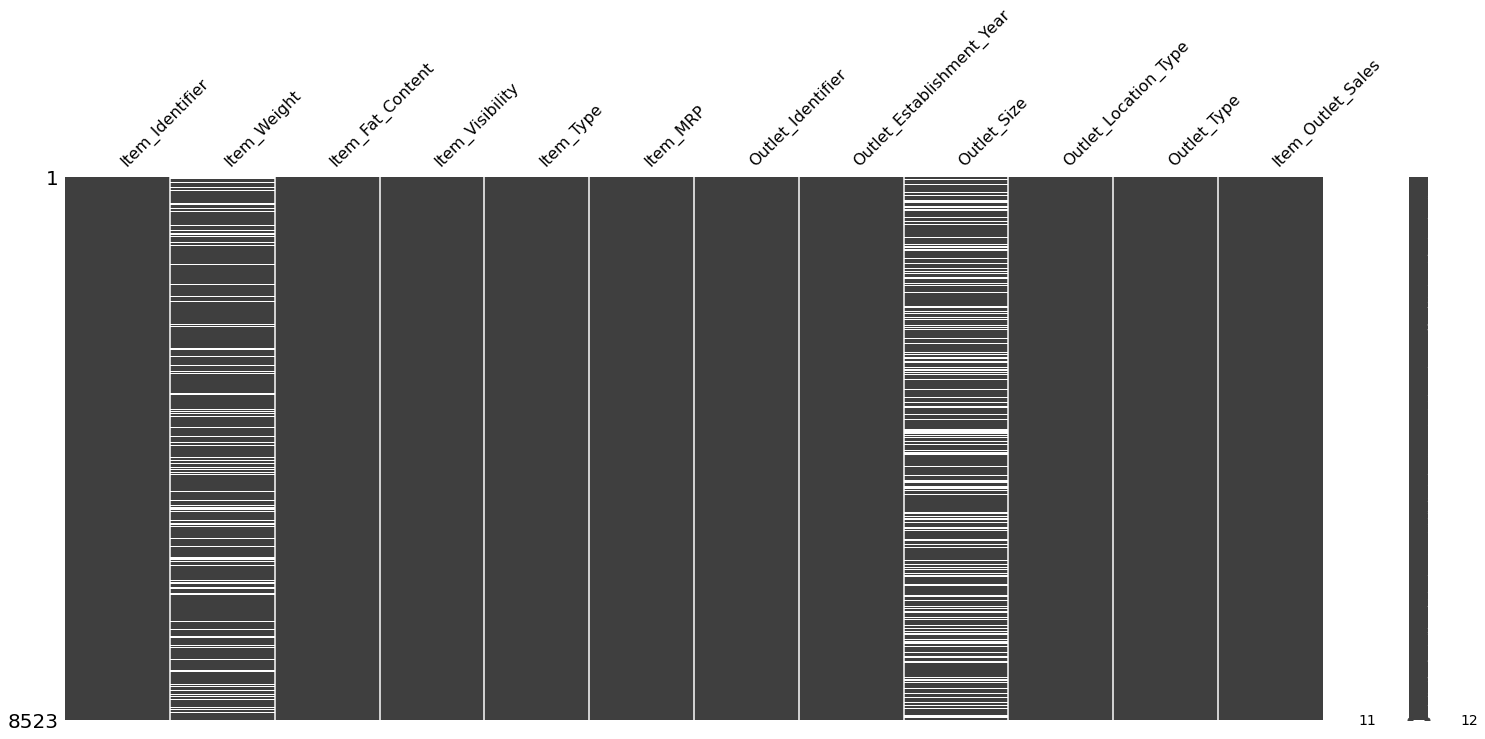

In [13]:
from tqdm.notebook import tqdm
from time import sleep
number_list = list(range(100))
for x in tqdm(number_list):
   sleep(0.05) 
print ('Completed')

import missingno as msno  # to visually check missing numbers/values.
msno.matrix(sales_train);

**There are missing values in Item_Weights and Outlet_Size**

In [14]:
sales_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
sales_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [16]:
for name in sales_train.columns:
    print(name)
    print(sales_train[name].unique())
    print( )

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Item_Weight
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12.    10.1    7.785 13.15
  8.5    7.6

In [17]:
sales_train.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [18]:
from xplore.data import xplore
data = sales_train
xplore(data)

------------------------------------
The fist 5 entries of your dataset are:

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium      

[y/n]: y
Generating report... 




Your Report has been generated and saved as 'output.html'


In [19]:
# Total percentage of the missing values
missing_data = sales_train.isnull().sum()
total_percentage = (missing_data.sum()/sales_train.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 45.44%


In [20]:
total = sales_train.isnull().sum().sort_values(ascending=False)

In [21]:
sales_train.isnull().count()

Item_Identifier              8523
Item_Weight                  8523
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  8523
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [22]:
percent_total = (sales_train.isnull().sum()/ sales_train.isnull().count()).sort_values(ascending=False)*100
percent_total

Outlet_Size                  28.276428
Item_Weight                  17.165317
Item_Outlet_Sales             0.000000
Outlet_Type                   0.000000
Outlet_Location_Type          0.000000
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Item_MRP                      0.000000
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Fat_Content              0.000000
Item_Identifier               0.000000
dtype: float64

In [23]:
total = sales_train.isnull().sum().sort_values(ascending=False)
sales_train.isnull().count()
percent_total = (sales_train.isnull().sum()/ sales_train.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317


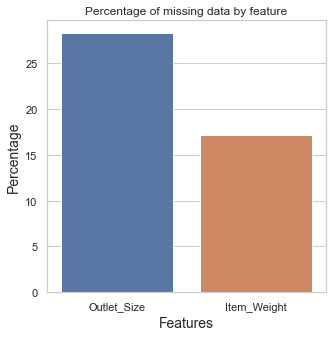

In [24]:
# Plotting the percentage of missing values
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

plt.show()

In [25]:
from sklearn.impute import SimpleImputer
# Instantiating the models
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Replacing the missing values in the new_cases variable with the mean
sales_train['Item_Weight'] = mean_imputer.fit_transform(sales_train['Item_Weight'].values.reshape(-1, 1))

In [26]:
sales_train['Outlet_Size'] = sales_train['Outlet_Size'].map({'Small':1, 'Medium':2, 'High':3})

In [27]:
from sklearn.impute import SimpleImputer
# Instantiating the models
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Replacing the missing values in the new_cases variable with the mode
sales_train['Outlet_Size'] = mode_imputer.fit_transform(sales_train['Outlet_Size'].values.reshape(-1, 1))

In [28]:
print("Q: Are there any missing values still in training data?", "\n" +
      "A: {}".format(sales_train.isna().values.any()))

Q: Are there any missing values still in training data? 
A: False


In [29]:
sales_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [30]:
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.0,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.0,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.0,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2.0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.0,Tier 3,Supermarket Type1,994.7052


In [31]:
def rewrite(x):
    x = x.replace("reg", "Regular")
    return x

In [32]:
sales_train['Item_Fat_Content'] = sales_train['Item_Fat_Content'].apply(rewrite)
sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].apply(rewrite)

In [33]:
def rewrite_(y):
    y = y.replace("LF", "Low Fat")
    return y

In [34]:
sales_train['Item_Fat_Content'] = sales_train['Item_Fat_Content'].apply(rewrite_)
sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].apply(rewrite_)

In [35]:
def rewrite__(z):
    z = z.replace("low fat", "Low Fat")
    return z

In [36]:
sales_train['Item_Fat_Content'] = sales_train['Item_Fat_Content'].apply(rewrite__)
sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].apply(rewrite__)

In [37]:
sales_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [38]:
sales_test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [39]:
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.0,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.0,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.0,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2.0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.0,Tier 3,Supermarket Type1,994.7052


In [40]:
# Replacing it back into categorical values so to visualize wit it
sales_train['Outlet_Size'] = sales_train['Outlet_Size'].replace(1.000000,'Small')
sales_train['Outlet_Size'] = sales_train['Outlet_Size'].replace(2.000000,'Medium')
sales_train['Outlet_Size'] = sales_train['Outlet_Size'].replace(3.000000,'High')

In [41]:
# Changing the data type of establishment year into a object, as the years are not representing any numerical values but categorical
sales_train['Outlet_Establishment_Year']  = sales_train['Outlet_Establishment_Year'].astype('object')

sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(8)
memory usage: 799.2+ KB


In [42]:
sales_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [43]:
#max_threshold = sales_train['Item_Visibility'].quantile(0.93)
#print(max_threshold)
#min_threshold = sales_train['Item_Visibility'].quantile(0.07)
#print(min_threshold)

#new_data = sales_train[ (sales_train.Item_Visibility < max_threshold) & (sales_train.Item_Visibility > min_threshold) ]

# Outliers 

In [44]:
sales_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


# Item_Outlet_Sales

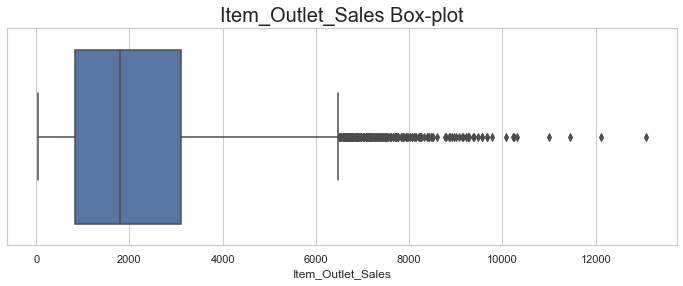

In [45]:
plt.figure(figsize=(12, 4))
sns.boxplot('Item_Outlet_Sales', data = sales_train);
plt.title('Item_Outlet_Sales Box-plot', fontsize=20);

**There are outliers PRESENT**

### Treating the outlier in Item_Outlet_Sales

In [46]:
max_threshold = sales_train['Item_Outlet_Sales'].quantile(0.97)
print("Maximum threshold:", max_threshold)

min_threshold = sales_train['Item_Outlet_Sales'].quantile(0.03)
print("Minimum threshold:", min_threshold)

new_sales_train_based_on_Outlet_Sales = sales_train[ (sales_train['Item_Outlet_Sales'] < max_threshold) & 
                                    (sales_train['Item_Outlet_Sales'] > min_threshold) ]


Maximum threshold: 6094.3070880000005
Minimum threshold: 145.583828


In [47]:
new_train = new_sales_train_based_on_Outlet_Sales.copy()

In [48]:
new_train.to_csv(r'C:\Users\Maxie\Desktop\Big-Mart Sales Prediction.csv', index = False)

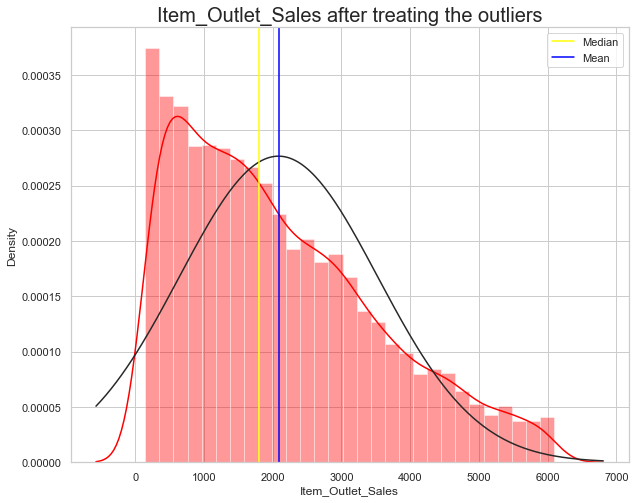

In [49]:
plt.figure(figsize=(10, 8))
sns.distplot(new_train['Item_Outlet_Sales'], fit = norm, color='red')
plt.title('Item_Outlet_Sales after treating the outliers', fontsize=20)
plt.axvline(new_train['Item_Outlet_Sales'].median(),color='yellow',label='Median')
plt.axvline(new_train['Item_Outlet_Sales'].mean(),color='blue',label='Mean')
plt.legend();

In [50]:
print ("Mean :", new_train['Item_Outlet_Sales'].mean())
print ("Median :", new_train['Item_Outlet_Sales'].median())
print( )
print ("Skewness under 'Item_Outlet_Salest' :", new_train['Item_Outlet_Sales'].skew())
print("Kurtosis under 'Item_Outlet_Sales' : ", new_train['Item_Outlet_Sales'].kurt())

Mean : 2085.067683684941
Median : 1794.3310000000001

Skewness under 'Item_Outlet_Salest' : 0.7294063976490921
Kurtosis under 'Item_Outlet_Sales' :  -0.2537845171519879


**The distribution is positively skewed which says some of the items have sales less then the mean value.**

**The distribution curve is platykurtic which tells that it is less prone to the outliers.**

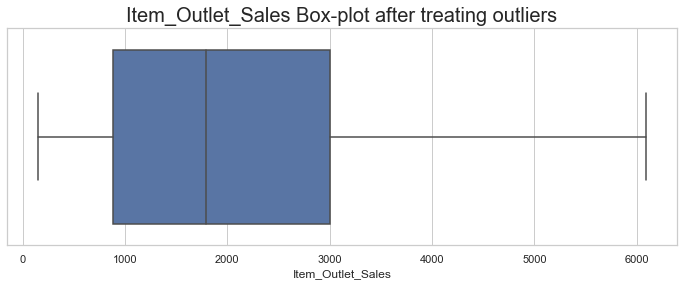

In [51]:
plt.figure(figsize=(12, 4))
sns.boxplot('Item_Outlet_Sales', data = new_train);
plt.title('Item_Outlet_Sales Box-plot after treating outliers', fontsize=20);

# Item_Weight

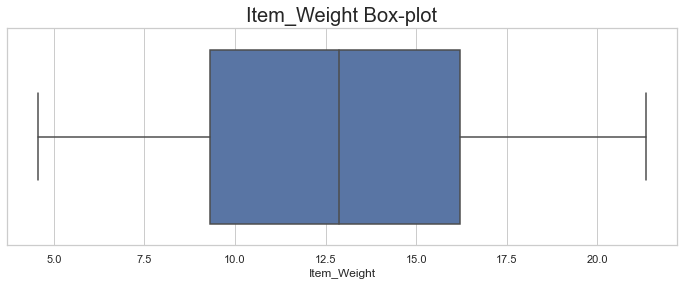

In [52]:
plt.figure(figsize=(12, 4))
sns.boxplot('Item_Weight', data = new_train);
plt.title('Item_Weight Box-plot', fontsize=20);

**There are no outliers here**

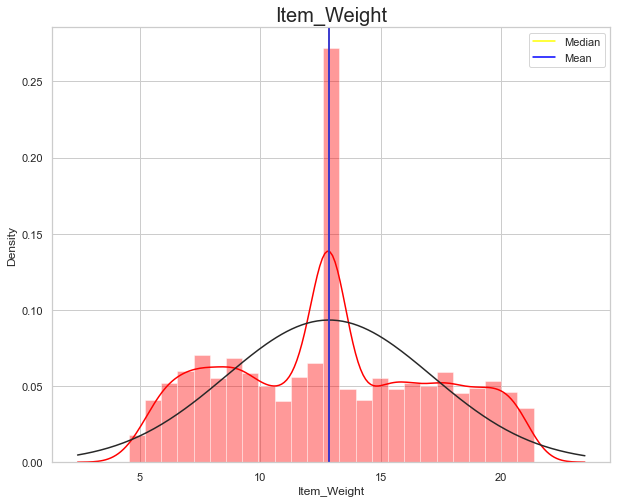

In [53]:
plt.figure(figsize=(10, 8))
sns.distplot(new_train['Item_Weight'], fit = norm, color='red')
plt.title('Item_Weight', fontsize=20)
plt.axvline(new_train['Item_Weight'].median(),color='yellow',label='Median')
plt.axvline(new_train['Item_Weight'].mean(),color='blue',label='Mean')
plt.legend();

In [54]:
print ("Mean :", new_train['Item_Weight'].mean())
print ("Median :", new_train['Item_Weight'].median())
print( )
print ("Skewness under 'Item_Weight' :", new_train['Item_Weight'].skew())
print("Kurtosis under 'Item_Weight' : ", new_train['Item_Weight'].kurt())

Mean : 12.860747765643435
Median : 12.857645184135976

Skewness under 'Item_Weight' : 0.08806892067785946
Kurtosis under 'Item_Weight' :  -0.9040115018989914


**The distribution looks symmetric as the mean and the median value are almost same**

**The distribution curve is platykurtic which tells that it is less prone to the outliers.**

# Item_Visibility

## Detecting the outlier in Item_Visibility

In [55]:
new_train['Item_Visibility'].min()  # But the minimum value of the item visibility feature is zero(0)

0.0

In [56]:
# The minimum value of the item visibility feature is zero(0)
# Replacing the minimum value with the 2nd minimum value of the feature, as item visibility cannot be zero
new_train['Item_Visibility'] = new_train['Item_Visibility'].replace(0.000000,0.003574698)
new_train['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.003575
4       0.003575
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8011, dtype: float64

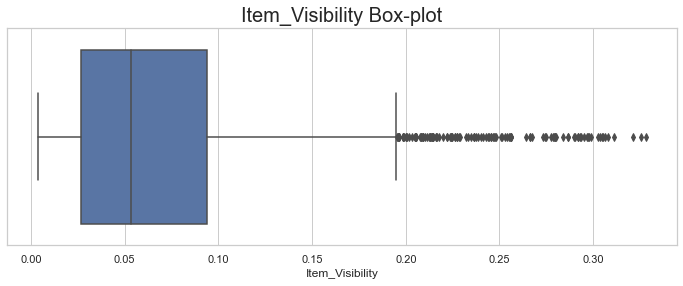

In [57]:
plt.figure(figsize=(12, 4))
sns.boxplot('Item_Visibility', data = new_train)
plt.title('Item_Visibility Box-plot', fontsize=20);

**The outliers in the Item outlet sales features are from 6250 +**

## Treating the outlier in Item_Visibility

In [58]:
max_threshold = new_train['Item_Visibility'].quantile(0.98)
print("Maximum threshold:", max_threshold)

min_threshold = new_train['Item_Visibility'].quantile(0.02)
print("Minimum threshold:", min_threshold)

new_train = new_train[ (new_train['Item_Visibility'] < max_threshold) & (new_train['Item_Visibility'] > min_threshold) ]


Maximum threshold: 0.18445131939999998
Minimum threshold: 0.003574698


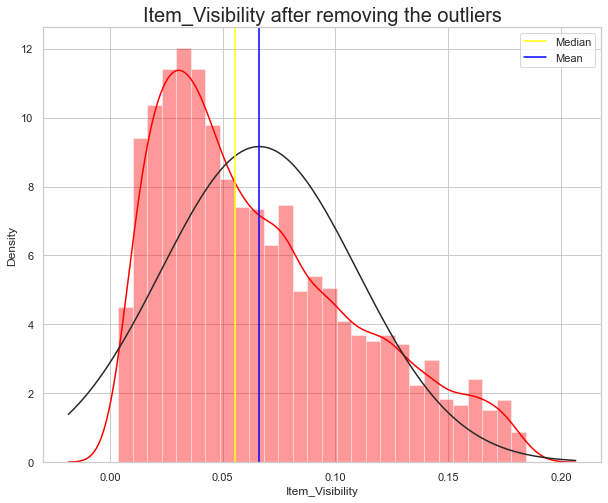

In [59]:
plt.figure(figsize=(10, 8))
sns.distplot(new_train['Item_Visibility'], fit = norm, color='red')
plt.title('Item_Visibility after removing the outliers', fontsize=20)
plt.axvline(new_train['Item_Visibility'].median(),color='yellow',label='Median')
plt.axvline(new_train['Item_Visibility'].mean(),color='blue',label='Mean')
plt.legend();

In [60]:
print ("Mean :", new_train['Item_Visibility'].mean())
print ("Median :", new_train['Item_Visibility'].median())
print( )
print ("Skewness under 'Item_Visibility' :", new_train['Item_Visibility'].skew())
print("Kurtosis under 'Item_Visibility' : ", new_train['Item_Visibility'].kurt())


Mean : 0.0661711908541526
Median : 0.055558509000000006

Skewness under 'Item_Visibility' : 0.7557320893577627
Kurtosis under 'Item_Visibility' :  -0.32033627470400994


**The distribution is positively skewed which says some of the items are less visible than the mean value.**

**The distribution curve is platykurtic which tells that it is less prone to the outliers.**

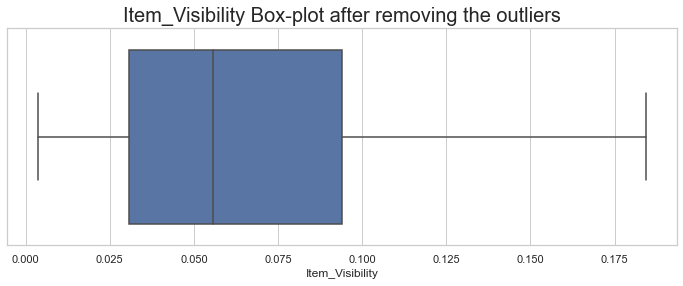

In [61]:
fig = plt.subplots(figsize=(12, 4))
sns.boxplot(new_train['Item_Visibility'])
plt.title('Item_Visibility Box-plot after removing the outliers', fontsize=20);

# Item_MRP

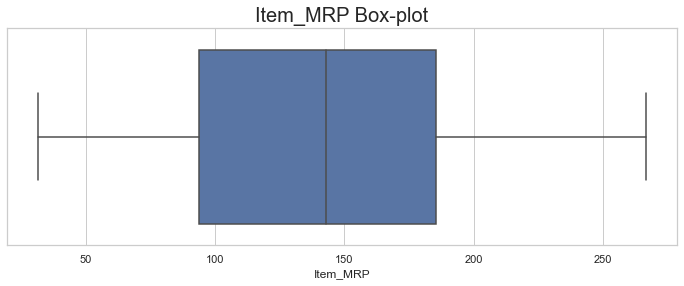

In [62]:
plt.figure(figsize=(12, 4))
sns.boxplot('Item_MRP', data = sales_train)
plt.title('Item_MRP Box-plot', fontsize=20);

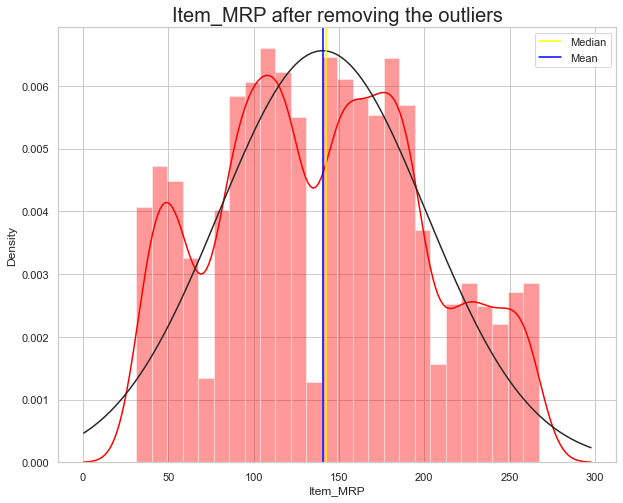

In [63]:
plt.figure(figsize=(10, 8))
sns.distplot(new_train['Item_MRP'], fit = norm, color='red')
plt.title('Item_MRP after removing the outliers', fontsize=20)
plt.axvline(new_train['Item_MRP'].median(),color='yellow',label='Median')
plt.axvline(new_train['Item_MRP'].mean(),color='blue',label='Mean')
plt.legend();


In [64]:
print ("Mean :", new_train['Item_MRP'].mean())
print ("Median :", new_train['Item_MRP'].median())
print( )
print ("Skewness under 'Item_MRP' :", new_train['Item_MRP'].skew())
print("Kurtosis under 'Item_MRP' : ", new_train['Item_MRP'].kurt())

Mean : 140.4591519097459
Median : 142.7128

Skewness under 'Item_MRP' : 0.1342779987114367
Kurtosis under 'Item_MRP' :  -0.8339905812645636


**The distribution looks symmetric as the mean and the median value are almost same**

**The distribution curve is platykurtic which tells that it is less prone to the outliers.**

<AxesSubplot:>

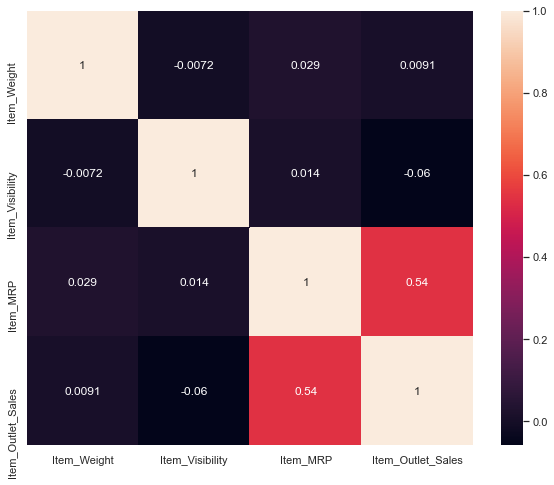

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(new_train.corr(), annot=True)

*Item MRP and Item outlet sales shows high positive correlation which tells that as the MRP of the item increases the sales of that item also increases.* **(Rule for positive correlation)**

*Similarly we can also notice that the item visibility and item outlet sales are negatively correlated which means that if the item is less visible then the sale of the item is more or if the item is more visible then the sale of the item is less..*
**(They're negatively correlated)**


# Univariate Analysis


Completed


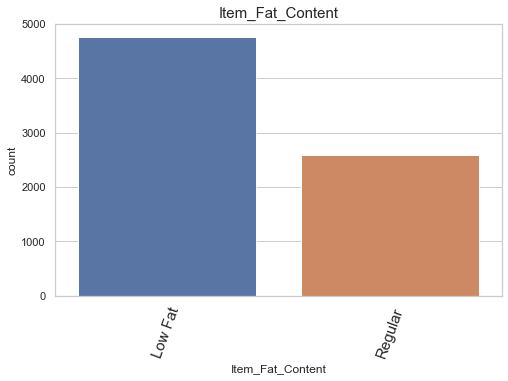

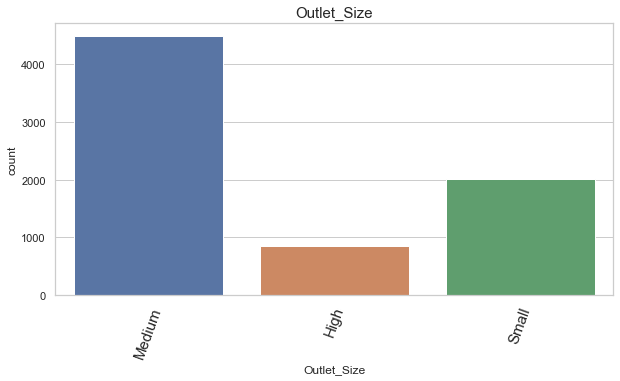

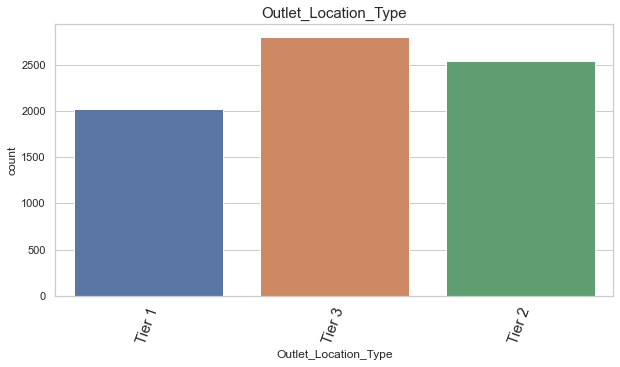

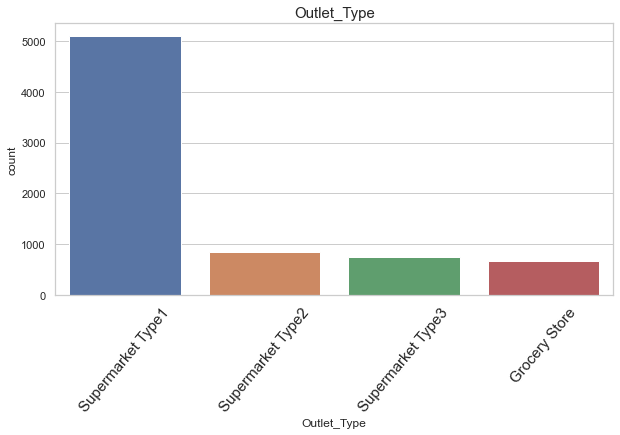

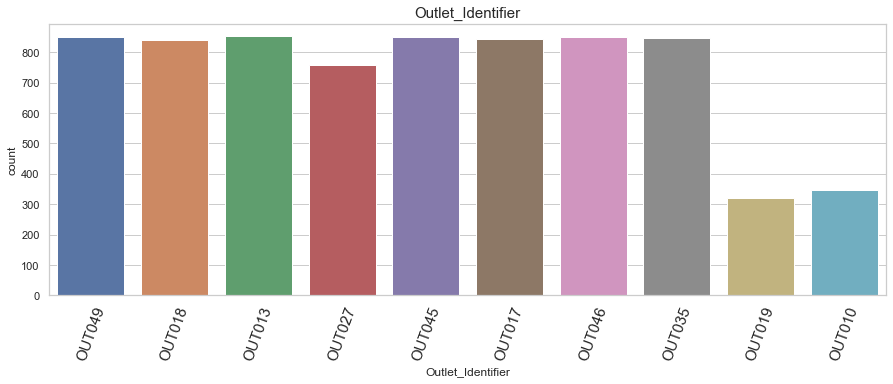

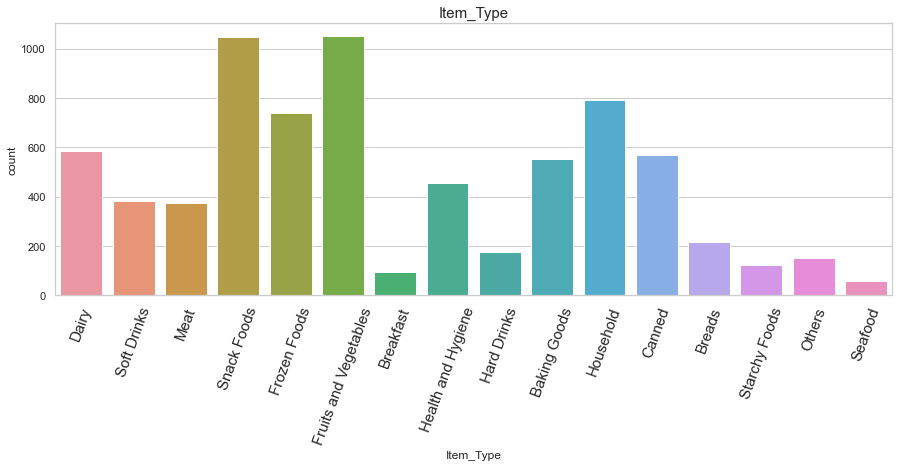

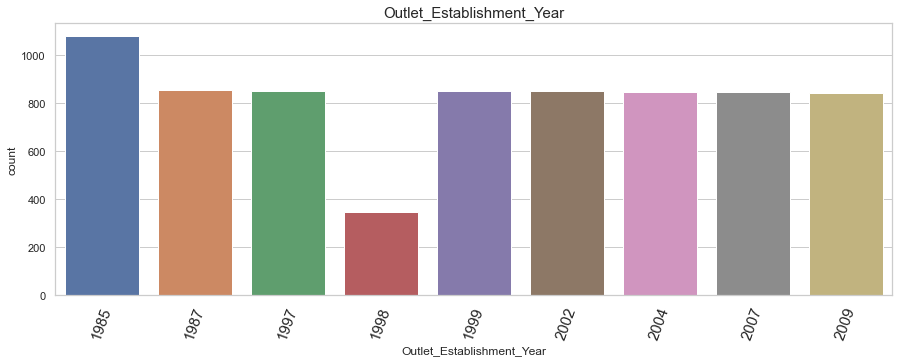

In [66]:
from tqdm.notebook import tqdm
from time import sleep
number_list = list(range(100))
for x in tqdm(number_list):
   sleep(0.05) 
print ('Completed')


fig = plt.figure(figsize=(8, 5))
sns.countplot(new_train['Item_Fat_Content'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Fat_Content", fontsize=15)
plt.show()

fig = plt.figure(figsize=(10, 5))
sns.countplot(new_train['Outlet_Size'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Outlet_Size", fontsize=15)
plt.show()

fig = plt.figure(figsize=(10, 5))
sns.countplot(new_train['Outlet_Location_Type'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Outlet_Location_Type", fontsize=15)
plt.show()

fig = plt.figure(figsize=(10, 5))
sns.countplot(new_train['Outlet_Type'])
plt.xticks(rotation=50, fontsize=15)
plt.title("Outlet_Type", fontsize=15)
plt.show()

fig = plt.figure(figsize=(15, 5))
sns.countplot(new_train['Outlet_Identifier'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Outlet_Identifier", fontsize=15)
plt.show()

fig = plt.figure(figsize=(15, 5))
sns.countplot(new_train['Item_Type'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Type", fontsize=15)
plt.show()

fig = plt.figure(figsize=(15, 5))
sns.countplot(new_train['Outlet_Establishment_Year'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Outlet_Establishment_Year", fontsize=15)
plt.show()

# Multivariate Analysis


Completed


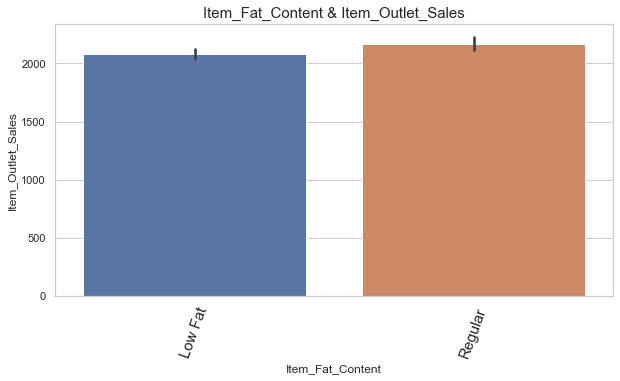

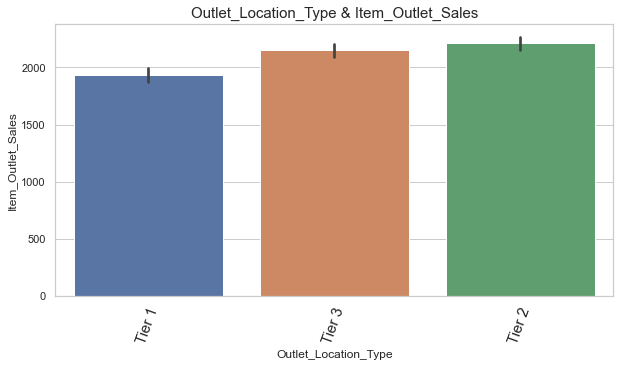

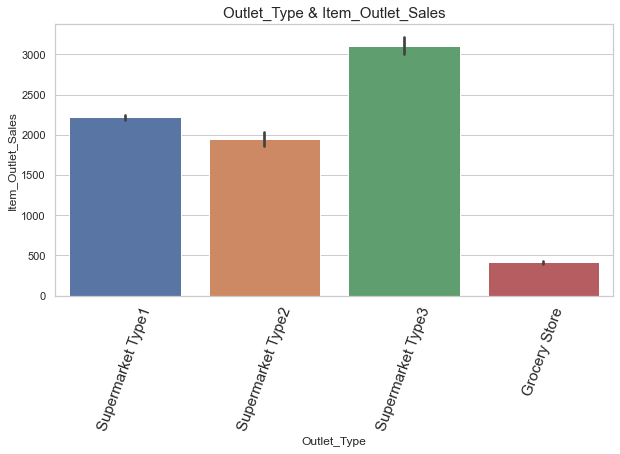

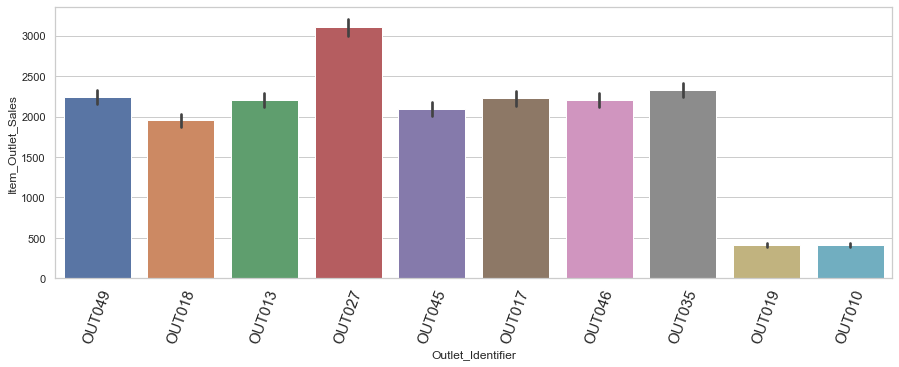

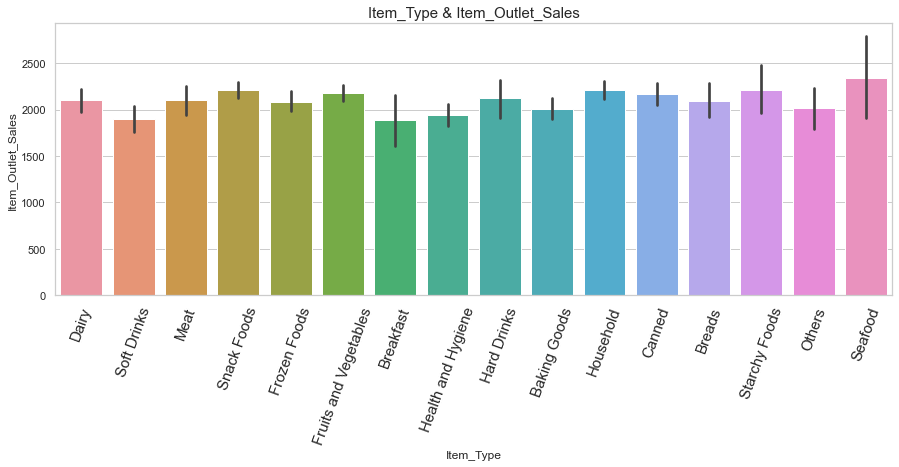

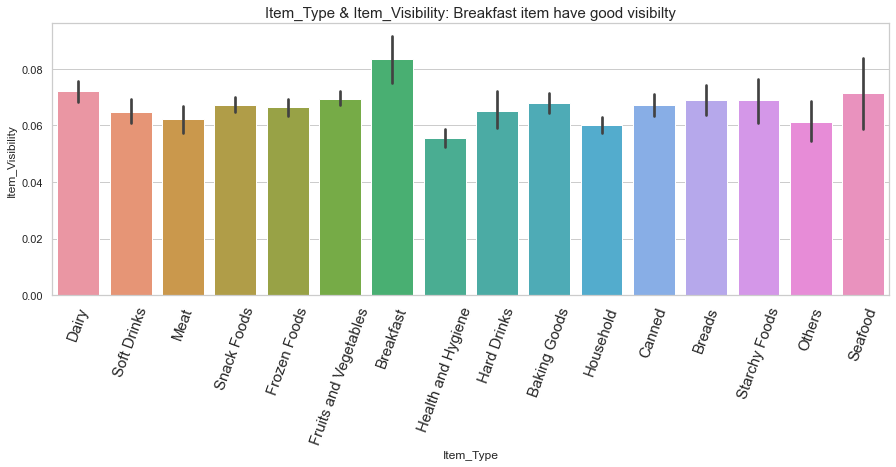

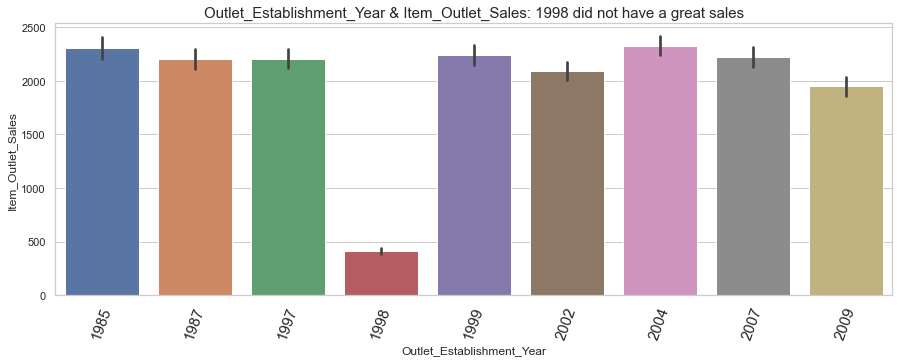

In [67]:
from tqdm.notebook import tqdm
from time import sleep
number_list = list(range(100))
for x in tqdm(number_list):
   sleep(0.05) 
print ('Completed')

fig = plt.figure(figsize=(10, 5))
sns.barplot(new_train['Item_Fat_Content'], new_train['Item_Outlet_Sales'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Fat_Content & Item_Outlet_Sales", fontsize=15)
plt.show()

print( )

fig = plt.figure(figsize=(10, 5))
sns.barplot(new_train['Outlet_Location_Type'], new_train['Item_Outlet_Sales'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Outlet_Location_Type & Item_Outlet_Sales", fontsize=15) 
plt.show()

print( )

fig = plt.figure(figsize=(10, 5))
sns.barplot(new_train['Outlet_Type'], new_train['Item_Outlet_Sales'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Outlet_Type & Item_Outlet_Sales", fontsize=15)
plt.show()

print( )

fig = plt.figure(figsize=(15, 5))
sns.barplot(new_train['Outlet_Identifier'], new_train['Item_Outlet_Sales'])
plt.xticks(rotation=70, fontsize=15)
plt.show()

print( )

fig = plt.figure(figsize=(15, 5))
sns.barplot(new_train['Item_Type'], new_train['Item_Outlet_Sales'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Type & Item_Outlet_Sales", fontsize=15)
plt.show()

print( )

fig = plt.figure(figsize=(15, 5))
sns.barplot(new_train['Item_Type'],new_train['Item_Visibility'])
plt.xticks(rotation=70,fontsize=15)
plt.title("Item_Type & Item_Visibility: Breakfast item have good visibilty", fontsize=15)


print( )

fig = plt.figure(figsize=(15, 5))
sns.barplot(new_train['Outlet_Establishment_Year'], new_train['Item_Outlet_Sales'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Outlet_Establishment_Year & Item_Outlet_Sales: 1998 did not have a great sales", fontsize=15)
plt.show()


In [68]:
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## After the treating outliers 


Completed


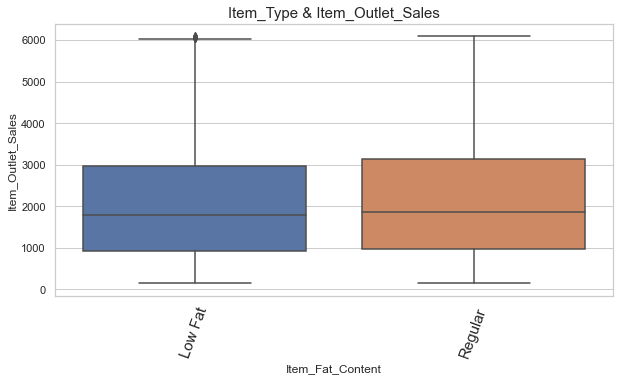

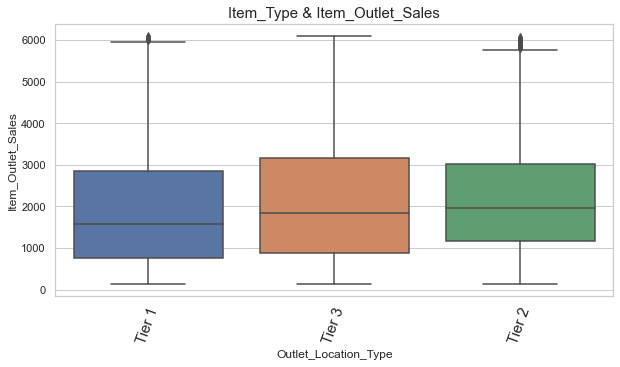

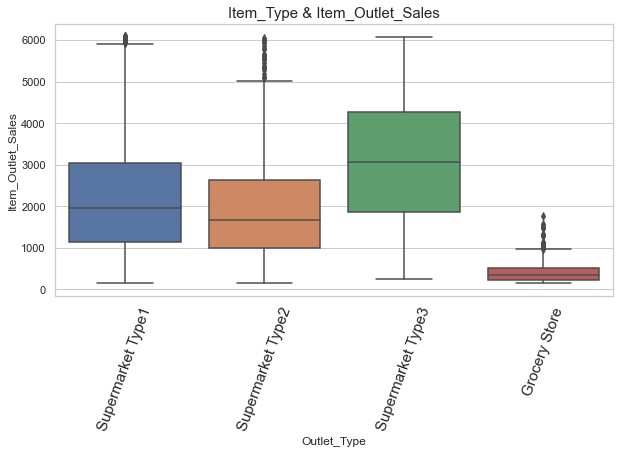

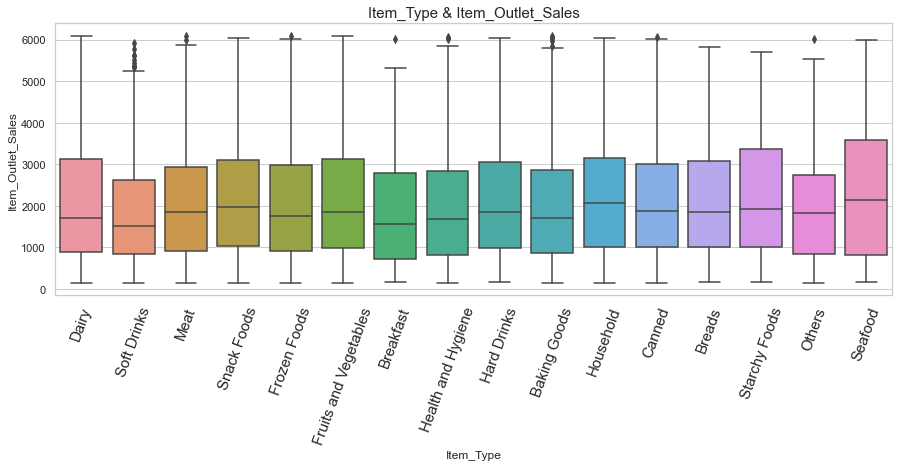

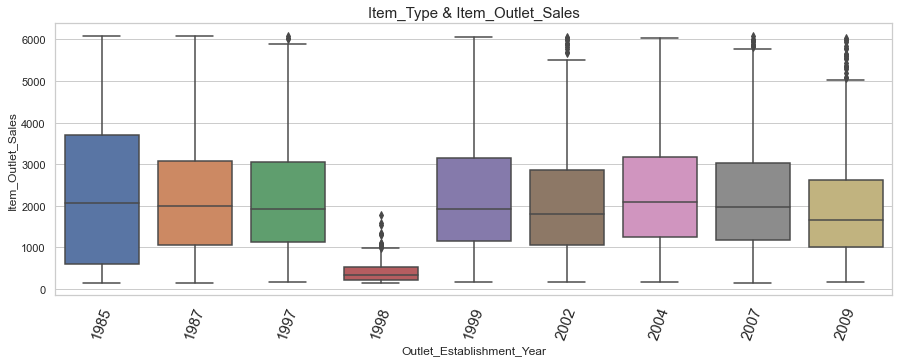

In [69]:
from tqdm.notebook import tqdm
from time import sleep
number_list = list(range(100))
for x in tqdm(number_list):
   sleep(0.05) 
print ('Completed')

fig = plt.figure(figsize=(10, 5))
sns.boxplot(new_train['Item_Fat_Content'], new_train['Item_Outlet_Sales'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Type & Item_Outlet_Sales", fontsize=15)
plt.show()

print( )

fig = plt.figure(figsize=(10, 5))
sns.boxplot(new_train['Outlet_Location_Type'], new_train['Item_Outlet_Sales'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Type & Item_Outlet_Sales", fontsize=15) 
plt.show()

print( )

fig = plt.figure(figsize=(10, 5))
sns.boxplot(new_train['Outlet_Type'], new_train['Item_Outlet_Sales'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Type & Item_Outlet_Sales", fontsize=15)
plt.show()

print( )

fig = plt.figure(figsize=(15, 5))
sns.boxplot(new_train['Item_Type'], new_train['Item_Outlet_Sales'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Type & Item_Outlet_Sales", fontsize=15)
plt.show()

print( )

fig = plt.figure(figsize=(15, 5))
sns.boxplot(new_train['Outlet_Establishment_Year'], new_train['Item_Outlet_Sales'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Type & Item_Outlet_Sales", fontsize=15)
plt.show()


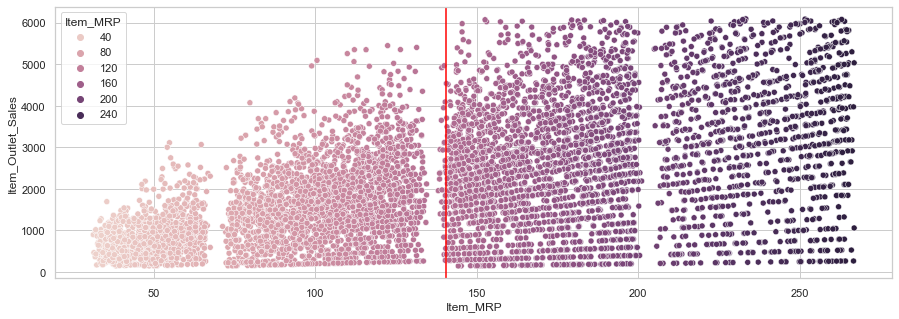

In [70]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_MRP',data=new_train)
plt.axvline(new_train['Item_MRP'].mean(),color='red',label='Mean')

**By looking at the plot we can say that if the MRP is high, then the sales are high. If an item has MRP more then the mean value then the its sales are higher.**

In [71]:
new_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [72]:
new_train['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
6       Regular
7       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 7357, dtype: object

In [73]:
# Mapping the binary features
new_train['Item_Fat_Content'] = new_train['Item_Fat_Content'].map({'Low Fat': 1, 'Regular': 0})


new_train['Outlet_Size'] = new_train['Outlet_Size'].map({'Small': 1, 'Medium': 2, 'High':3})

In [74]:
# Changing the data type of establishment year into a object, as the years are not representing any numerical values but categorical

#new_train['Item_Fat_Content'] = new_train['Item_Fat_Content'].astype('int')
#new_train['Outlet_Size'] = new_train['Outlet_Size'].astype('int')

new_train['Outlet_Establishment_Year']  = new_train['Outlet_Establishment_Year'].astype('int')
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7357 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7357 non-null   object 
 1   Item_Weight                7357 non-null   float64
 2   Item_Fat_Content           7357 non-null   int64  
 3   Item_Visibility            7357 non-null   float64
 4   Item_Type                  7357 non-null   object 
 5   Item_MRP                   7357 non-null   float64
 6   Outlet_Identifier          7357 non-null   object 
 7   Outlet_Establishment_Year  7357 non-null   int32  
 8   Outlet_Size                7357 non-null   int64  
 9   Outlet_Location_Type       7357 non-null   object 
 10  Outlet_Type                7357 non-null   object 
 11  Item_Outlet_Sales          7357 non-null   float64
dtypes: float64(4), int32(1), int64(2), object(5)
memory usage: 1.0+ MB


In [75]:
new_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,1,0.016047,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,0,0.019278,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,1,0.016760,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700
6,FDO10,13.650000,0,0.012741,Snack Foods,57.6588,OUT013,1987,3,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,1,0.127470,Snack Foods,107.7622,OUT027,1985,2,Tier 3,Supermarket Type3,4022.7636


In [76]:
# Creating dummy variables of all the other categorical features
ItemType = pd.get_dummies(new_train['Item_Type'], prefix='ItemType', drop_first=True)
new_train = pd.concat([new_train, ItemType],axis=1)

OutletID = pd.get_dummies(new_train['Outlet_Identifier'], prefix='OutletID',drop_first=True)
new_train = pd.concat([new_train, OutletID],axis=1)

OutLocType = pd.get_dummies(new_train['Outlet_Location_Type'], prefix='OutLocType',drop_first=True)
new_train = pd.concat([new_train, OutLocType],axis=1)

OutletType = pd.get_dummies(new_train['Outlet_Type'], prefix='OutletType',drop_first=True)
new_train = pd.concat([new_train, OutletType],axis=1)

In [77]:
new_train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Location_Type',
            'Outlet_Type','Outlet_Size','Outlet_Establishment_Year'], axis=1, inplace=True)

In [78]:
X = new_train.drop(['Item_Outlet_Sales'], axis=1)

y = new_train['Item_Outlet_Sales']

In [79]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,ItemType_Breads,ItemType_Breakfast,ItemType_Canned,ItemType_Dairy,ItemType_Frozen Foods,ItemType_Fruits and Vegetables,ItemType_Hard Drinks,ItemType_Health and Hygiene,ItemType_Household,ItemType_Meat,ItemType_Others,ItemType_Seafood,ItemType_Snack Foods,ItemType_Soft Drinks,ItemType_Starchy Foods,OutletID_OUT013,OutletID_OUT017,OutletID_OUT018,OutletID_OUT019,OutletID_OUT027,OutletID_OUT035,OutletID_OUT045,OutletID_OUT046,OutletID_OUT049,OutLocType_Tier 2,OutLocType_Tier 3,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3
0,9.300000,1,0.016047,249.8092,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,5.920000,0,0.019278,48.2692,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2,17.500000,1,0.016760,141.6180,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
6,13.650000,0,0.012741,57.6588,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
7,12.857645,1,0.127470,107.7622,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,1,0.056783,214.5218,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
8519,8.380000,0,0.046982,108.1570,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
8520,10.600000,1,0.035186,85.1224,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
8521,7.210000,0,0.145221,103.1332,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [80]:
y

0       3735.1380
1        443.4228
2       2097.2700
6        343.5528
7       4022.7636
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 7357, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 70, shuffle = True)

In [82]:
from tqdm.notebook import tqdm
from time import sleep
number_list = list(range(100))
for x in tqdm(number_list):
   sleep(0.05) 


from sklearn.feature_selection import mutual_info_regression

mi_reg = pd.Series(mutual_info_regression(X_train, y_train),
                  index= X_train.columns).sort_values(ascending=False)
mi_reg

Item_MRP                          0.654084
OutletID_OUT019                   0.069745
Item_Weight                       0.049362
Item_Visibility                   0.047242
OutletType_Supermarket Type1      0.044109
OutletType_Supermarket Type3      0.035322
OutletID_OUT027                   0.033053
Item_Fat_Content                  0.017615
OutLocType_Tier 2                 0.017479
ItemType_Snack Foods              0.016452
ItemType_Household                0.011214
ItemType_Frozen Foods             0.009999
ItemType_Hard Drinks              0.009315
OutletID_OUT049                   0.006504
ItemType_Health and Hygiene       0.006500
ItemType_Dairy                    0.006096
OutletID_OUT045                   0.005295
OutletID_OUT046                   0.005190
OutletID_OUT018                   0.005144
ItemType_Breakfast                0.004924
ItemType_Canned                   0.004521
ItemType_Others                   0.004336
OutletID_OUT017                   0.004140
ItemType_St

**from the Mutual Info Regression;**

**Item_MRP, OutletID_OUT019, Item_Visibility, OutletType_Supermarket Type1, Item_Weight are the most important features**

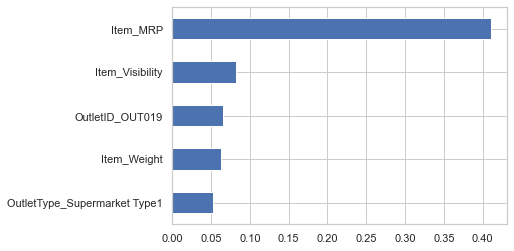

In [83]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

# To look at the best features
feat_importances = pd.Series(model.feature_importances_ , index=X.columns)
feat_importances.nlargest().sort_values(ascending=True).plot(kind='barh')
plt.show()

**from the ExtraTreesRegressor;**

**Item_MRP, Item_Visibility, OutletID_OUT019, Item_Weight, OutletType_Supermarket Type1 are the most important features**

In [84]:
# Linear Regression
from sklearn.linear_model import LinearRegression

Lreg = LinearRegression()
Lreg.fit(X_train, y_train)
# Predict
y_pred = Lreg.predict(X_test)


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Train set accuracy : {:.2f}'.format(Lreg.score(X_train,y_train)))
print('Test set accuracy : {:.2f}'.format(Lreg.score(X_test,y_test)))
print ( )
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Mean Squared Error : ", MSE)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)


print ( )
print ( )
# viewing the intercept and the coefficients of the model.
print('Linear regression coef_ : {}'.format(Lreg.coef_))
print()
print('Linear regression intercept_ : {}'.format(Lreg.intercept_))

Train set accuracy : 0.54
Test set accuracy : 0.52

R squared value:  0.5211187778538906
Mean Squared Error :  1003161.9156443194
Root Mean Squared Error :  1001.5797100801909
Mean Absolute Error :  774.4624864555796


Linear regression coef_ : [-2.39958821e-01 -6.29710248e+01 -1.23937587e+02  1.40900432e+01
 -7.04385014e+01 -1.81828573e+02  2.15059131e+01 -1.29259768e+02
 -4.34851168e+01  4.19399513e-01 -8.89204211e+01  8.28828862e+00
 -1.46042004e+01  2.54738133e+01  7.04563966e+01  2.75737561e+02
 -2.23546034e+01 -3.68525787e+01 -8.65067625e+01  6.65661851e+02
  1.02176602e+02  9.04926238e+02 -3.26567488e+02  1.56957765e+03
  1.63884182e+02 -6.79302381e+01  2.30491552e+02  3.25166718e+02
  1.98130546e+02 -4.27221328e+02  1.41945067e+03  9.04926238e+02
  1.56957765e+03]

Linear regression intercept_ : -1373.5917278491006


In [85]:
# Ridge Regression
from sklearn.linear_model import Ridge

Ridge = Ridge(alpha = 10)
Ridge.fit(X_train, y_train)
# Predict
y_pred = Ridge.predict(X_test)

# Comparing the model accuracy on the train data and the test score using their score (R square)
print('Train set accuracy : {:.2f}'.format(Ridge.score(X_train,y_train)))
print('Test set accuracy : {:.2f}'.format(Ridge.score(X_test,y_test)))

print()

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Mean Squared Error : ", MSE)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

Train set accuracy : 0.54
Test set accuracy : 0.52

R squared value:  0.5212856978370222
Mean Squared Error :  1002812.2511298347
Root Mean Squared Error :  1001.4051383580147
Mean Absolute Error :  774.7099781177176


In [86]:
# Lasso Regression
from sklearn.linear_model import Lasso

Lasso = Lasso(alpha = 0.10)
Lasso.fit(X_train, y_train)
# Predict
y_pred = Lasso.predict(X_test)

# Comparing the model accuracy on the train data and the test score using their score (R square)
print('Train set accuracy : {:.2f}'.format(Lasso.score(X_train,y_train)))
print('Test set accuracy : {:.2f}'.format(Lasso.score(X_test,y_test)))
print('Number of features used: {}'.format(np.sum(Lasso.coef_ != 0)))
print()
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Mean Squared Error : ", MSE)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

Train set accuracy : 0.54
Test set accuracy : 0.52
Number of features used: 32

R squared value:  0.5212234439350888
Mean Squared Error :  1002942.6608026967
Root Mean Squared Error :  1001.4702495844281
Mean Absolute Error :  774.3719736355004


In [87]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=200)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

# Comparing the model accuracy on the train data and the test score using their score (R square)
print('Train set accuracy : {:.2f}'.format(rf_reg.score(X_train,y_train)))
print('Test set accuracy : {:.2f}'.format(rf_reg.score(X_test,y_test)))
print()
MSE=mean_squared_error(y_test, y_pred)
MAE=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Mean Squared Error : ", MSE)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

Train set accuracy : 0.93
Test set accuracy : 0.52

R squared value:  0.5227331448414615
Mean Squared Error :  999780.1345159075
Root Mean Squared Error :  999.8900612146855
Mean Absolute Error :  745.8914656725544


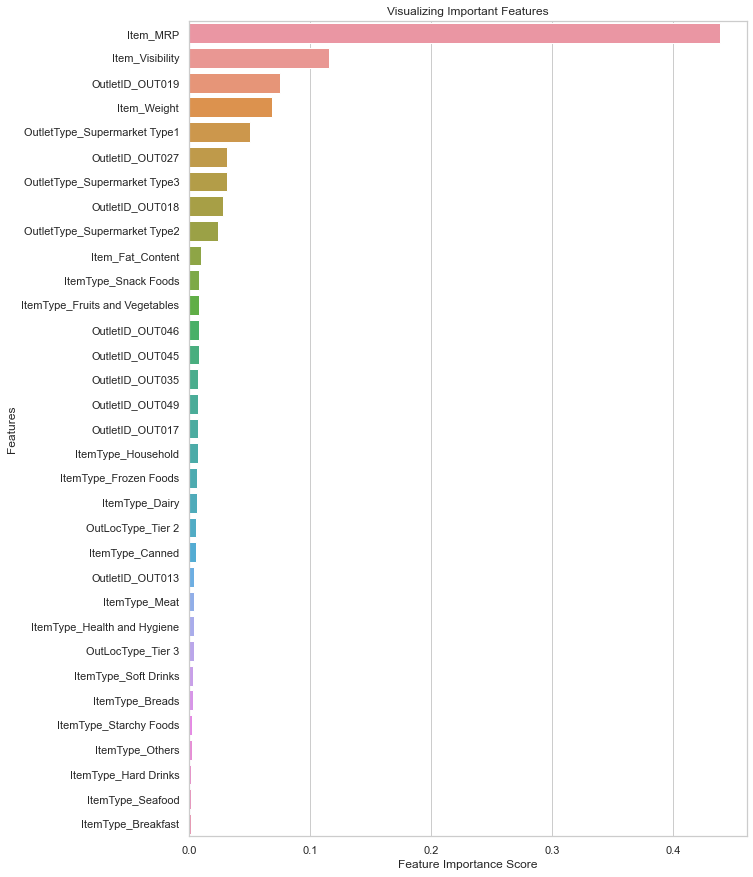

In [88]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train, y_train)

feature_imp = pd.Series(reg.feature_importances_, index = X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,15))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [89]:
from sklearn.neighbors import KNeighborsRegressor
kn_reg = KNeighborsRegressor(n_neighbors=2)
kn_reg.fit(X_train, y_train)

y_pred = kn_reg.predict(X_test)

# Comparing the model accuracy on the train data and the test score using their score (R square)
print('Train set accuracy : {:.2f}'.format(kn_reg.score(X_train,y_train)))
print('Test set accuracy : {:.2f}'.format(kn_reg.score(X_test,y_test)))
print()
print("R squared value: ", r2)
print("Mean Squared Error : ", MSE)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

Train set accuracy : 0.74
Test set accuracy : 0.23

R squared value:  0.5227331448414615
Mean Squared Error :  999780.1345159075
Root Mean Squared Error :  999.8900612146855
Mean Absolute Error :  745.8914656725544


In [90]:
#Fitting XGB regressor 
from xgboost import XGBRegressor
XGBreg = XGBRegressor()
XGBreg.fit(X_train, y_train)

y_pred = XGBreg.predict(X_test)

# Comparing the model accuracy on the train data and the test score using their score (R square)
print('Train set accuracy : {:.2f}'.format(XGBreg.score(X_train,y_train)))
print('Test set accuracy : {:.2f}'.format(XGBreg.score(X_test,y_test)))
print()
print("R squared value: ", r2)
print("Mean Squared Error : ", MSE)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

Train set accuracy : 0.83
Test set accuracy : 0.50

R squared value:  0.5227331448414615
Mean Squared Error :  999780.1345159075
Root Mean Squared Error :  999.8900612146855
Mean Absolute Error :  745.8914656725544


**Comparing the models we can say that the Random forest model is the best as it has good metrics value.**

**For predicting the test data, we will use Linear regression and Random Forest Regressor models.**

# TESTING set

In [91]:
sales_test = pd.read_csv(r"test.csv", sep=',', encoding="latin1") 
pd.set_option('display.max_columns', None)

In [92]:
sales_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Cleaning Testing Dataset

In [93]:
# Filling the null values with the mean value
sales_test['Item_Weight'].fillna(sales_test['Item_Weight'].mean(), inplace=True)
sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [94]:
sales_test['Outlet_Size'] = sales_test['Outlet_Size'].map({'Small': 1, 'Medium': 2, 'High': 3})

In [95]:
sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [96]:
sales_test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1254,FDY03,17.60,Regular,0.076107,Meat,113.0202,OUT035,2004,1.0,Tier 2,Supermarket Type1
985,FDL38,13.80,reg,0.014816,Canned,87.5172,OUT017,2007,NaN,Tier 2,Supermarket Type1
1109,FDV02,16.75,Low Fat,0.060546,Dairy,172.5106,OUT046,1997,1.0,Tier 1,Supermarket Type1
1873,FDT45,15.85,Low Fat,0.057430,Snack Foods,53.2956,OUT045,2002,NaN,Tier 2,Supermarket Type1
2682,FDB52,17.75,Low Fat,0.030430,Dairy,257.2672,OUT035,2004,1.0,Tier 2,Supermarket Type1


In [97]:
sales_test['Outlet_Size'] = sales_test['Outlet_Size'].fillna(sales_test['Outlet_Size'].median())
sales_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [98]:
sales_test['Item_Visibility'] = sales_test['Item_Visibility'].replace(0.000000,0.003591414)

In [99]:
sales_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065907,141.023273,1997.828903,1.829079
std,4.245189,0.050973,61.809091,8.372256,0.600328
min,4.555000,0.003591,31.990000,1985.000000,1.000000
25%,9.195000,0.027047,94.412000,1987.000000,1.000000
50%,12.695633,0.054154,141.415400,1999.000000,2.000000
75%,15.850000,0.093463,186.026600,2004.000000,2.000000
max,21.350000,0.323637,266.588400,2009.000000,3.000000


In [100]:
sales_test['Outlet_Establishment_Year'] = sales_test['Outlet_Establishment_Year'].astype('object')
sales_test['Outlet_Size'] = sales_test['Outlet_Size'].astype('object')

In [101]:
sales_test.describe()

,Item_Weight,Item_Visibility,Item_MRP
count,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065907,141.023273
std,4.245189,0.050973,61.809091
min,4.555000,0.003591,31.990000
25%,9.195000,0.027047,94.412000
50%,12.695633,0.054154,141.415400
75%,15.850000,0.093463,186.026600
max,21.350000,0.323637,266.588400


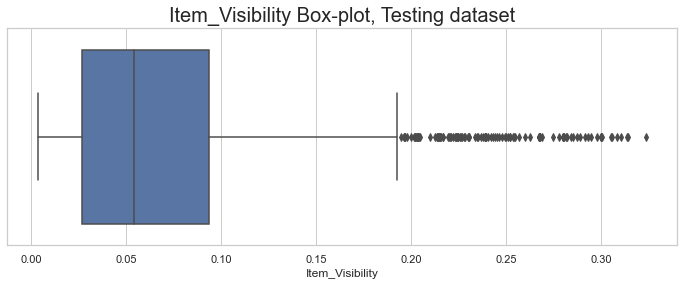

In [102]:
plt.figure(figsize=(12, 4))
sns.boxplot('Item_Visibility', data = sales_test)
plt.title('Item_Visibility Box-plot, Testing dataset', fontsize=20);

In [103]:
max_threshold = sales_test['Item_Visibility'].quantile(0.98)
print("Maximum threshold:", max_threshold)

min_threshold = sales_test['Item_Visibility'].quantile(0.02)
print("Minimum threshold:", min_threshold)

sales_test = sales_test[ (sales_test['Item_Visibility'] < max_threshold) & 
                                           (sales_test['Item_Visibility'] > min_threshold) ]
sales_test

Maximum threshold: 0.1908142625999988
Minimum threshold: 0.003591414


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,2,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,2,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,2,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,2,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,2,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5675,FDW46,13.000000,Regular,0.070411,Snack Foods,63.4484,OUT049,1999,2,Tier 1,Supermarket Type1
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,1,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,2,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,2,Tier 2,Supermarket Type1


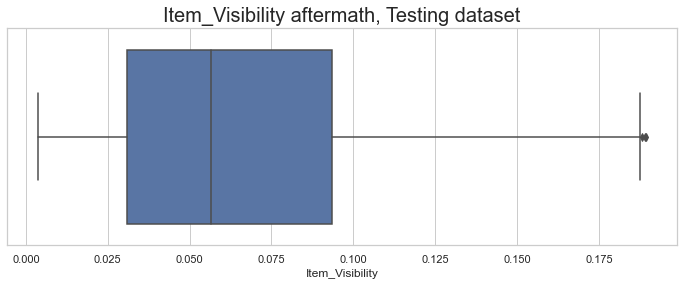

In [104]:
plt.figure(figsize=(12, 4))
sns.boxplot('Item_Visibility', data = sales_test)
plt.title('Item_Visibility aftermath, Testing dataset', fontsize=20);

In [105]:
sales_test['Item_Visibility'].isnull().sum()

0

--No outliers already in Item_Weight--


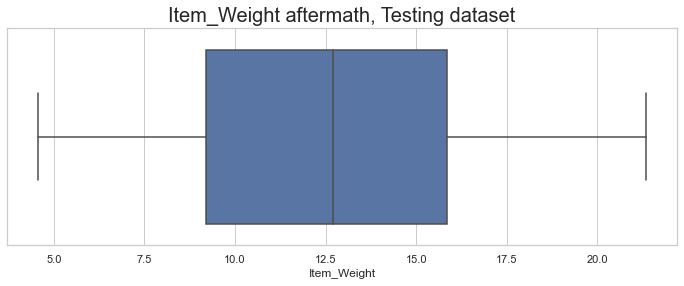

In [106]:
plt.figure(figsize=(12, 4))           # No outliers already
sns.boxplot('Item_Weight', data = sales_test)
plt.title('Item_Weight aftermath, Testing dataset', fontsize=20);

print("--No outliers already in Item_Weight--")

--No outliers already in Item_MRP--


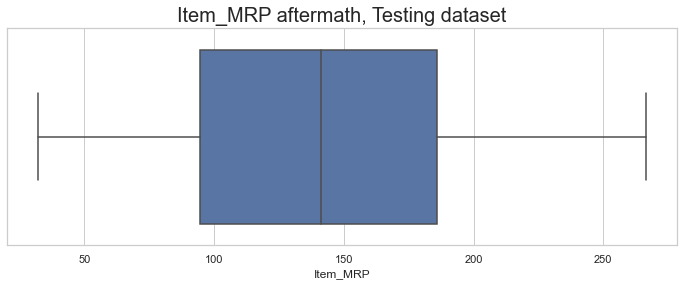

In [107]:
plt.figure(figsize=(12, 4))           # No outliers already
sns.boxplot('Item_MRP', data = sales_test)
plt.title('Item_MRP aftermath, Testing dataset', fontsize=20);

print("--No outliers already in Item_MRP--")

In [108]:
sales_test.describe()

,Item_Weight,Item_Visibility,Item_MRP
count,5214.000000,5214.000000,5214.000000
mean,12.680673,0.066253,141.132111
std,4.254597,0.043079,61.692041
min,4.555000,0.003591,31.990000
25%,9.195000,0.030781,94.552150
50%,12.695633,0.056538,141.299600
75%,15.850000,0.093519,186.081900
max,21.350000,0.189512,266.588400


In [109]:
sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].replace('low fat', 'Low Fat')
sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].replace('reg', 'Regular')
sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].replace('LF', 'Low Fat')

In [110]:
sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].map({'Low Fat': 1, 'Regular': 0})

In [111]:
# Creating dummy variables of all the other categorical features

ItemType = pd.get_dummies(sales_test['Item_Type'], prefix='ItemType', drop_first=True)
sales_test = pd.concat([sales_test, ItemType],axis=1)

OutletID = pd.get_dummies(sales_test['Outlet_Identifier'], prefix='OutletID',drop_first=True)
sales_test = pd.concat([sales_test, OutletID],axis=1)

OutLocType = pd.get_dummies(sales_test['Outlet_Location_Type'], prefix='OutLocType',drop_first=True)
sales_test = pd.concat([sales_test, OutLocType],axis=1)

OutletType = pd.get_dummies(sales_test['Outlet_Type'], prefix='OutletType',drop_first=True)
sales_test = pd.concat([sales_test, OutletType],axis=1)

In [112]:
LR_Prediction = pd.DataFrame(sales_test['Item_Identifier'])
LR_Prediction['Outlet_Identifier'] = sales_test['Outlet_Identifier']


RFR_Prediction = pd.DataFrame(sales_test['Item_Identifier'])
RFR_Prediction['Outlet_Identifier'] = sales_test['Outlet_Identifier']

In [113]:
sales_test.drop(['Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type',
                 'Outlet_Size','Outlet_Establishment_Year'],axis=1,inplace=True)

sales_test.drop('Item_Identifier',axis=1,inplace=True)

# Prediction

In [114]:
sales_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,ItemType_Breads,ItemType_Breakfast,ItemType_Canned,ItemType_Dairy,ItemType_Frozen Foods,ItemType_Fruits and Vegetables,ItemType_Hard Drinks,ItemType_Health and Hygiene,ItemType_Household,ItemType_Meat,ItemType_Others,ItemType_Seafood,ItemType_Snack Foods,ItemType_Soft Drinks,ItemType_Starchy Foods,OutletID_OUT013,OutletID_OUT017,OutletID_OUT018,OutletID_OUT019,OutletID_OUT027,OutletID_OUT035,OutletID_OUT045,OutletID_OUT046,OutletID_OUT049,OutLocType_Tier 2,OutLocType_Tier 3,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3
0,20.750000,1,0.007565,107.8622,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,8.300000,0,0.038428,87.3198,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
2,14.600000,1,0.099575,241.7538,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,7.315000,1,0.015388,155.0340,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
4,12.695633,0,0.118599,234.2300,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [115]:
sales_test.shape

(5214, 33)

In [116]:
Lreg_item_sales_ = Lreg.predict(sales_test)

LR_Prediction['Item_Outlet_Sales'] = Lreg_item_sales_ 
LR_Prediction.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1799.566368
1,FDW14,OUT017,1440.491778
2,NCN55,OUT010,1597.149318
3,FDQ58,OUT017,2441.613710
4,FDY38,OUT027,4491.647946


In [117]:
RFreg_item_sales_ = rf_reg.predict(sales_test)

RFR_Prediction['Item_Outlet_Sales'] = RFreg_item_sales_ 
RFR_Prediction.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1680.442581
1,FDW14,OUT017,1532.798102
2,NCN55,OUT010,513.674687
3,FDQ58,OUT017,1472.489938
4,FDY38,OUT027,3878.807653
